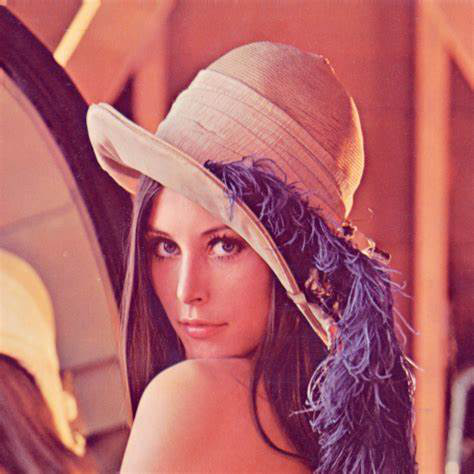

In [1]:
import torch
from torch import nn
from PIL import Image
from torchvision.transforms import ToTensor,ToPILImage
from torch.autograd import Variable as V
to_tensor=ToTensor()
to_pil=ToPILImage()
lena=Image.open('imgs/lena.jpeg')
lena

In [2]:
input=to_tensor(lena).unsqueeze(0)
print(input.shape)
kernel=torch.ones(3,3,3)/(-9)
for i in range(0,3): kernel[i][1][1]=1
print(kernel)
conv=nn.Conv2d(1,1,(3,3),1,bias=False)

torch.Size([1, 3, 474, 474])
tensor([[[-0.1111, -0.1111, -0.1111],
         [-0.1111,  1.0000, -0.1111],
         [-0.1111, -0.1111, -0.1111]],

        [[-0.1111, -0.1111, -0.1111],
         [-0.1111,  1.0000, -0.1111],
         [-0.1111, -0.1111, -0.1111]],

        [[-0.1111, -0.1111, -0.1111],
         [-0.1111,  1.0000, -0.1111],
         [-0.1111, -0.1111, -0.1111]]])


torch.Size([1, 1, 472, 472])


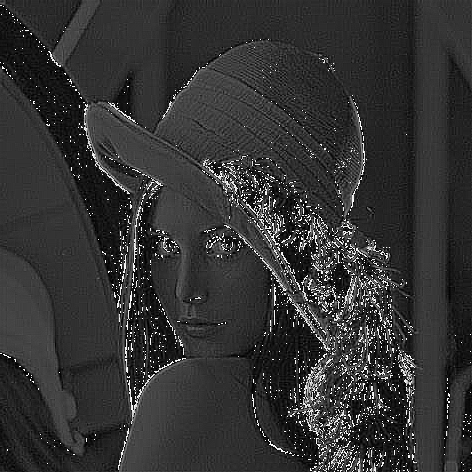

In [3]:
conv.weight.data=kernel.view(1,3,3,3)
output=conv(V(input))
print(output.shape)
to_pil(output.data.squeeze(0))

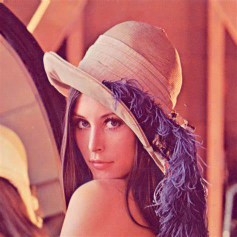

In [4]:
pool=nn.AvgPool2d(2,2)
output2=pool(V(input))
to_pil(output2.data.squeeze(0))

In [5]:
output2.shape

torch.Size([1, 3, 237, 237])

In [6]:
input=V(torch.randn(2,3))
linear=nn.Linear(3,4)
h=linear(input)
h

tensor([[-0.0891, -1.0036, -0.2369,  0.0325],
        [ 0.4599, -0.1238, -0.3969,  0.0278]], grad_fn=<AddmmBackward>)

In [8]:
bn=nn.BatchNorm1d(4)
########################################bn没弄懂
# bn.weight.data=torch.ones(4)*4
# bn.bias.data=torch.zeros(4)
bn_out=bn(h)
bn_out

tensor([[-0.9999, -1.0000,  0.9992,  0.5962],
        [ 0.9999,  1.0000, -0.9992, -0.5962]],
       grad_fn=<NativeBatchNormBackward>)

In [13]:
h.mean(0)

tensor([ 0.1854, -0.5637, -0.3169,  0.0302], grad_fn=<MeanBackward1>)

In [14]:
h.var(0)

tensor([1.5067e-01, 3.8703e-01, 1.2789e-02, 1.1032e-05],
       grad_fn=<VarBackward1>)

In [25]:
a=(h[0][0]-h.mean(0)[0])/torch.sqrt(h.var(0)[0])
a


tensor(-0.7071, grad_fn=<DivBackward0>)

In [15]:
h.mean(0)[0]

tensor(0.1854, grad_fn=<SelectBackward>)